In [ ]:
Практична робота номер 4
МІТ-31, Голомозик Кирило

Завдання для бінарної класифікації (Binary Classification):

Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC. Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Завдання для мультикласової класифікації (Multiclass Classification):

Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини. Порівняйте результати різних класифікаторів.

Завдання для мультилейбл класифікації (Multilabel Classification):

Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації. Розділіть дані на навчальний та тестовий набори. Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла. Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів. Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.

Accuracy: 0.875
Precision: 0.7727272727272727
Recall: 1.0
F1 Score: 0.8717948717948718
AUC-ROC: 0.9335038363171355


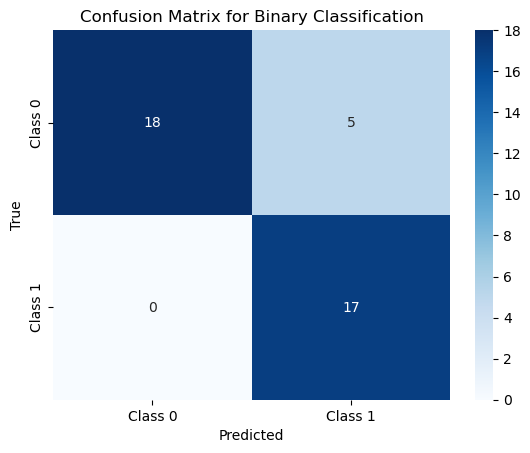

In [2]:
#Завдання для бінарної класифікації:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Зчитайте дані
data_binary = pd.read_csv("classification_dataset.csv")

# Розділіть дані на навчальний та тестовий набори
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(
    data_binary.drop("Target", axis=1), data_binary["Target"], test_size=0.2, random_state=42
)

# Навчіть класифікатор (логістичну регресію, наприклад)
classifier_bin = LogisticRegression()
classifier_bin.fit(X_bin_train, y_bin_train)

# Оцініть ефективність
y_bin_pred = classifier_bin.predict(X_bin_test)

print("Accuracy:", accuracy_score(y_bin_test, y_bin_pred))
print("Precision:", precision_score(y_bin_test, y_bin_pred))
print("Recall:", recall_score(y_bin_test, y_bin_pred))
print("F1 Score:", f1_score(y_bin_test, y_bin_pred))
print("AUC-ROC:", roc_auc_score(y_bin_test, classifier_bin.predict_proba(X_bin_test)[:, 1]))

# Візуалізуйте матрицю плутанини
cm_bin = confusion_matrix(y_bin_test, y_bin_pred)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Binary Classification')
plt.show()


In [ ]:
Завдання для мультикласової класифікації:


Accuracy: 0.675
Precision (micro): 0.675
Recall (micro): 0.675
F1 Score (micro): 0.675


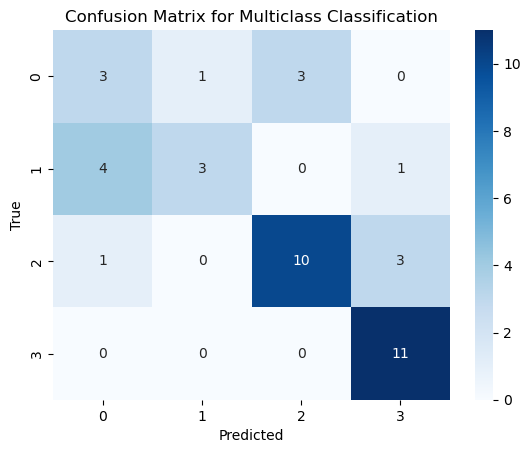

              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.75      0.38      0.50         8
           2       0.77      0.71      0.74        14
           3       0.73      1.00      0.85        11

    accuracy                           0.68        40
   macro avg       0.66      0.63      0.62        40
weighted avg       0.69      0.68      0.66        40



In [4]:
# Аналогічно, але для мультикласової класифікації
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Зчитайте дані
data_multi = pd.read_csv("multiclass_dataset.csv")

# Розділіть дані на навчальний та тестовий набори
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    data_multi.drop("Target", axis=1), data_multi["Target"], test_size=0.2, random_state=42
)

# Навчіть класифікатор (наприклад, RandomForest)
classifier_multi = RandomForestClassifier()
classifier_multi.fit(X_multi_train, y_multi_train)

# Оцініть ефективність
y_multi_pred = classifier_multi.predict(X_multi_test)

print("Accuracy:", accuracy_score(y_multi_test, y_multi_pred))
print("Precision (micro):", precision_score(y_multi_test, y_multi_pred, average='micro'))
print("Recall (micro):", recall_score(y_multi_test, y_multi_pred, average='micro'))
print("F1 Score (micro):", f1_score(y_multi_test, y_multi_pred, average='micro'))

# Візуалізуйте матрицю плутанини та інші метрики
cm_multi = confusion_matrix(y_multi_test, y_multi_pred)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Multiclass Classification')
plt.show()

print(classification_report(y_multi_test, y_multi_pred))


In [ ]:
Завдання для мультилейбл класифікації:


TypeError: 'float' object is not iterable